In [1]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from livelossplot.tf_keras import PlotLossesCallback
import os
import pandas as pd
import numpy as np
import os
from tkinter import *
from tkinter import messagebox
from PIL import ImageTk,Image

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28927  images/train\surprise\9969.jpg  surprise
28928  images/train\surprise\9985.jpg  surprise
28929  images/train\surprise\9990.jpg  surprise
28930  images/train\surprise\9992.jpg  surprise
28931  images/train\surprise\9996.jpg  surprise

[28932 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7497  images/test\surprise\9806.jpg  surprise
7498  images/test\surprise\9830.jpg  surprise
7499  images/test\surprise\9853.jpg  surprise
7500  images/test\surprise\9878.jpg  surprise
7501   images/test\surprise\993.jpg  surprise

[7502 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7497    images/test\surprise\9806.jpg
7498    images/test\surprise\9830.jpg
7499    images/test\surprise\9853.jpg
7500    images/test\surprise\9878.jpg
7501     images/test\surprise\993.jpg
Name:

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/28932 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7502 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("images/train/",target_size=(img_size,img_size),color_mode='grayscale'
                                                    , batch_size= batch_size , class_mode = 'categorical',shuffle = 'True')


validation_generator = datagen_train.flow_from_directory("images/test/",target_size=(img_size,img_size) , color_mode=
                                                    'grayscale' , batch_size= batch_size , class_mode = 
                                                    'categorical',shuffle = 'False')

Found 28932 images belonging to 7 classes.
Found 7502 images belonging to 7 classes.


In [86]:
model = Sequential()
# convolutional layers
model.add(Conv2D(64, kernel_size=(3,3),padding="same",
                  activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3,3), 
                 padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3)
                 , padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Conv2D(256, kernel_size=(3,3) , padding="same"
                 , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Flatten())
# fully connected layers
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# output layer
model.add(Dense(7, activation='softmax'))

opt = Adam(learning_rate=0.0005)
                    

In [87]:
model.compile(optimizer = opt, loss = 'categorical_crossentropy',
               metrics = 'accuracy' )
model.summary()


Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_182 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_237 (B  (None, 48, 48, 64)        256       
 atchNormalization)                                              
                                                                 
 max_pooling2d_146 (MaxPool  (None, 24, 24, 64)        0         
 ing2D)                                                          
                                                                 
 dropout_190 (Dropout)       (None, 24, 24, 64)        0         
                                                                 
 conv2d_183 (Conv2D)         (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_238 (B  (None, 24, 24, 128)     

 ing2D)                                                          
                                                                 
 dropout_192 (Dropout)       (None, 6, 6, 256)         0         
                                                                 
 conv2d_185 (Conv2D)         (None, 6, 6, 256)         590080    
                                                                 
 batch_normalization_240 (B  (None, 6, 6, 256)         1024      
 atchNormalization)                                              
                                                                 
 max_pooling2d_149 (MaxPool  (None, 3, 3, 256)         0         
 ing2D)                                                          
                                                                 
 dropout_193 (Dropout)       (None, 3, 3, 256)         0         
                                                                 
 flatten_28 (Flatten)        (None, 2304)              0         
          

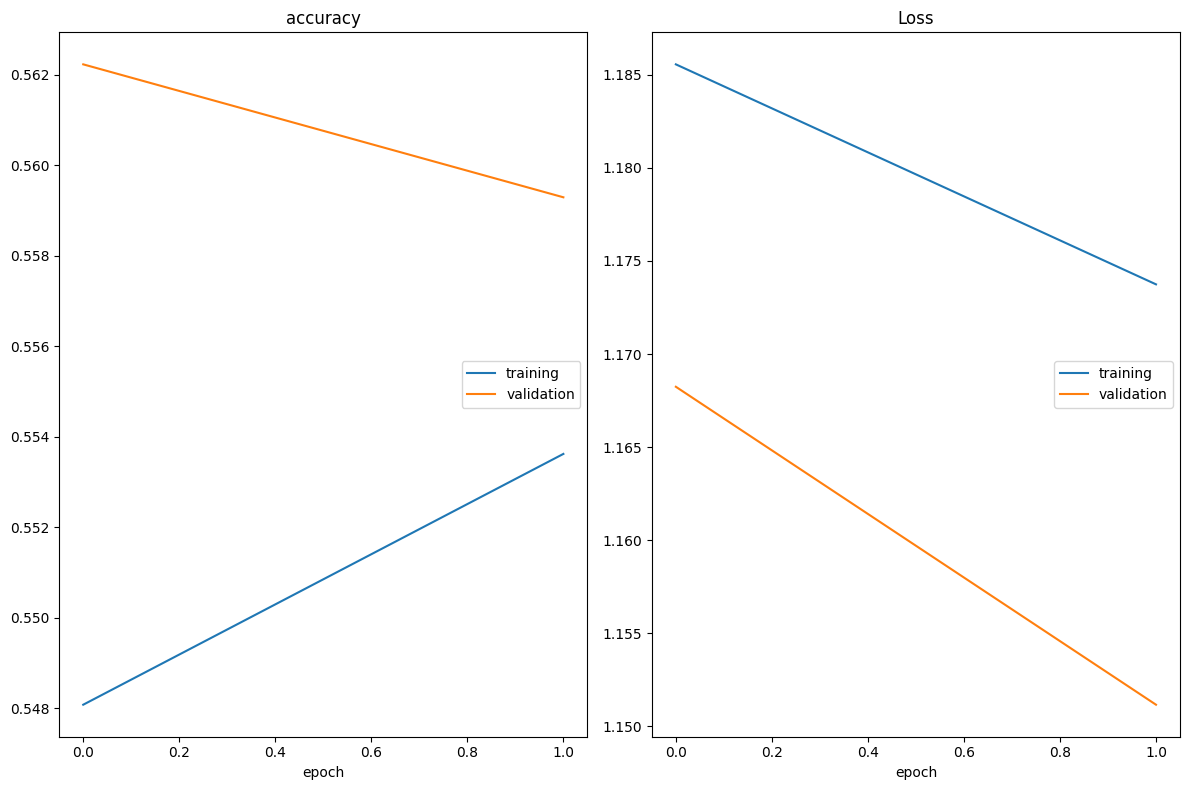

accuracy
	training         	 (min:    0.548, max:    0.554, cur:    0.554)
	validation       	 (min:    0.559, max:    0.562, cur:    0.559)
Loss
	training         	 (min:    1.174, max:    1.186, cur:    1.174)
	validation       	 (min:    1.151, max:    1.168, cur:    1.151)

Epoch 2: accuracy improved from 0.54808 to 0.55362, saving model to model_weights.keras
452/452 [==============================] - 632s 1s/step - loss: 1.1737 - accuracy: 0.5536 - val_loss: 1.1512 - val_accuracy: 0.5593 - lr: 5.0000e-04
Epoch 3/13
 16/452 [>.............................] - ETA: 9:16 - loss: 1.1771 - accuracy: 0.5469

KeyboardInterrupt: 

In [92]:
epochs = 13
steps_per_epoch = train_generator.n//train_generator.batch_size    
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.keras",monitor="accuracy",save_best_only = True,
                             save_weights_only = True,
                             mode = 'auto',
                             verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor="loss",factor=0.1,patience=2,min_lr=0.00001,mode = 'auto')

callbacks = [PlotLossesCallback(),checkpoint,reduce_lr]

history = model.fit(
    x = train_generator,
    steps_per_epoch= steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps= validation_steps, 
    callbacks = callbacks
)

In [98]:
model_json = model.to_json()
with open("model_json.json",'w') as json_file:
    json_file.write(model_json)
model.save("model_json.keras")

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [96]:
from keras.models import model_from_json

In [97]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [24]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [25]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [26]:
image = 'images/train/angry/0.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 360ms/step
model prediction is  angry


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 72ms/step
model prediction is  sad


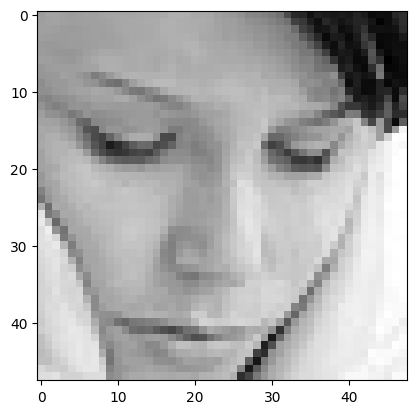

In [29]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 171ms/step
model prediction is  sad


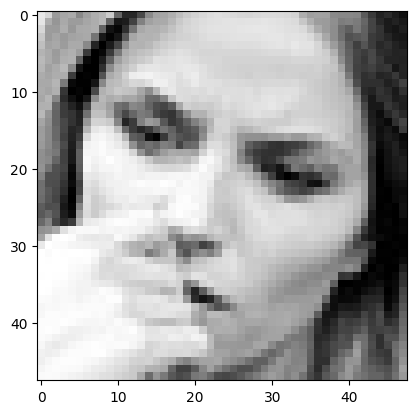

In [30]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 98ms/step
model prediction is  disgust


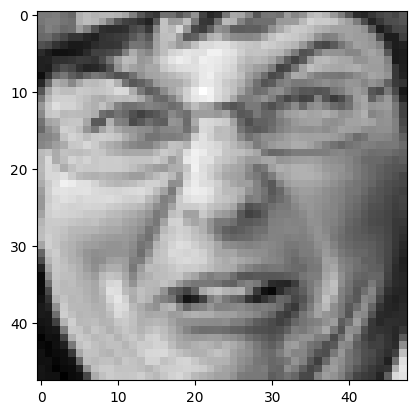

In [31]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 434ms/step
model prediction is  happy


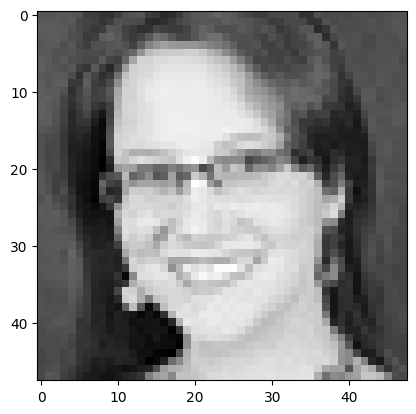

In [31]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 95ms/step
model prediction is  surprise


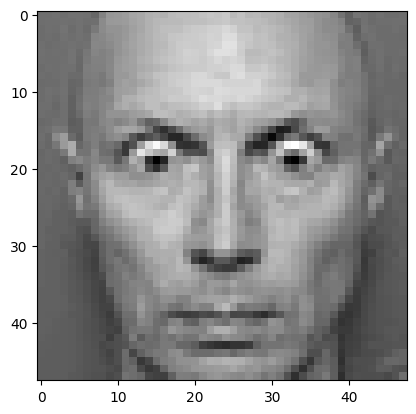

In [32]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')